# Comparaison des tris

On a vu trois principaux méthodes de tri: insertion, fusion, rapide. Ces trois tris effectuent la même tache à savoir trier les éléments d'une liste par ordre croissant.

On peut donc les comparer via leur complexité. L'algorithme le plus performant étant l'algorithme ayant la meilleure complexité. Faisons un tableau listant les complexités déterminées précédemment :


<table>
    <tr>
        <td>
algorithme
            
meilleur des cas

pire des cas
        </td>
        <td>
tri par insertion
    
O(n)

O(n$^2$)
        </td>
        <td>
tri par fusion
    
O(n$\log n$)

O(n$\log n$)
        </td>
        <td>
tri rapide
    
O(n$\log n$)

O(n$^2$)
        </td>
    </tr>
</table>

On remarque qu'il n'est pas facile de conclure, sur la base des complexités dans le meilleur et le pire des cas. En effet dans le meilleur des cas c'est le tri par insertion qui a une complexité linaire inférieure aux deux autres. Dans le pire des cas c'est le tri fusion qui a une complexité quasi-linéaire et inférieure aux deux autres.

Il nous faut plutôt la complexité moyenne des algorithmes lorsqu'on tire au hasard des listes à trier. Nous n'avons pas à notre disposition d'outil de probabilité pour calculer la complexité moyenne, mais nous pouvons l'obtenir par simulation numérique.

In [1]:
def echange(L, i, j):
    L[i], L[j] = L[j], L[i]
    
def insertion(L, i):
    j = i
    while j > 0 and L[j] < L[j - 1]:
        echange(L, j - 1, j)
        j -= 1
        
def tri_insertion(L):
    L_prime = []
    L_prime.append(L[0])
    for i in range(1, len(L)):
        L_prime.append(L[i])
        insertion(L_prime, i)
    return L_prime


def diviser(L):
    n = len(L)
    milieu = n//2
    return L[:milieu], L[milieu:]

def fusion(L_1,L_2) :
    i=0
    j=0
    L = []
    while (i<len(L_1))and(j<len(L_2)):
        if L_1[i]<L_2[j] :
            L.append(L_1[i])
            i += 1
        else :
            L.append(L_2[j])
            j +=1
    if i == len(L_1) :
        L += L_2[j:]
    elif j == len(L_2) :
        L += L_1[i:]
    return L

def tri_fusion(L):
    if len(L) == 1:
        return L
    else:
        L_1,L_2 = diviser(L)
        L_1 = tri_fusion(L_1)
        L_2 = tri_fusion(L_2)
        return fusion(L_1,L_2)
    
def positionnement_pivot(L,debut,fin):
    p = L[debut]
    j = debut
    for i in range(debut,fin):
        if p > L[i] :
            L = L[:j]+[L[i]]+L[j:i]+L[i+1:]
            j +=1
            
    return j,L

def tri_rapide_rec(L,debut,fin):
    if debut+1>=fin :
        return L
    else :
        j,L = positionnement_pivot(L,debut,fin)
        debut_1 = debut
        fin_1 = j
        L = tri_rapide_rec(L,debut_1,fin_1)
        debut_2 = j+1
        fin_2 = fin
        L = tri_rapide_rec(L,debut_2,fin_2)
        return L
    
def tri_rapide(L) :
    L = tri_rapide_rec(L,0,len(L))
    return L

C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


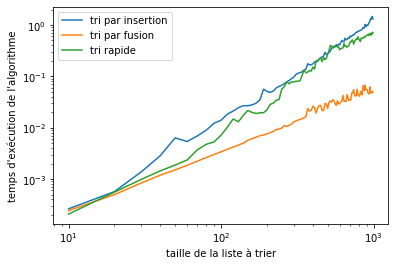

In [11]:
import time
import matplotlib.pyplot as plt
import numpy as np
import random as rd

def complexite_moyenne(n_min,n_max,pas,nbre_moyenne,algorithme):
    duree = []
    taille = []
    i = 0
    for n in range(n_min,n_max,pas):
        taille.append(n)
        duree.append(0)
        L=list(range(n))
        for m in range(nbre_moyenne):
            rd.shuffle(L)
            depart = time.clock()
            algorithme(L)
            arrive = time.clock()
            duree[i]=duree[i]+arrive-depart
        i += 1
    return taille, duree
   
n_min,n_max,pas,nbre_moyenne = 10,1000,10,10
    
taille_insertion, duree_insertion = complexite_moyenne(n_min,n_max,pas,nbre_moyenne,tri_insertion)
taille_fusion, duree_fusion = complexite_moyenne(n_min,n_max,pas,nbre_moyenne,tri_fusion)
taille_rapide, duree_rapide = complexite_moyenne(n_min,n_max,pas,nbre_moyenne,tri_rapide)

plt.loglog(taille_insertion,duree_insertion,'-')
plt.loglog(taille_fusion,duree_fusion,'-')
plt.loglog(taille_rapide,duree_rapide,'-')
plt.xlabel('taille de la liste à trier')
plt.ylabel("temps d'exécution de l'algorithme")
plt.legend(('tri par insertion','tri par fusion','tri rapide'), loc='upper left')

plt.show()

On peut alors déterminer selon la taille de la liste quel est l'algorithme le plus performant en moyenne.

# Recherche de la médiane

## Premières méthodes

Une application du tri d'une liste est la recherche de la médiane de ses éléments.

Une première méthode directe serait de prendre après avoir trié la liste l'élément au centre de la liste. En effet on aura alors autant d'élément supérieur que inférieur à celui placé au centre, c'est la définition de la médiane.

Un premier exemple simple d'algorithme de recherche de la médiane serait donc le suivant.

In [3]:
def mediane_rapide(L):
    L = tri_rapide(L)
    return L[len(L)//2]

on peut l'essayer sur plusieurs listes exemples

In [4]:
L = [14, 1, 4, 3]
mediane_rapide(L)

4

In [5]:
L = [15,4,2,9,55,16,0,1]
mediane_rapide(L)

9

on peut aussi utiliser les autres méthodes de tri à savoir par insertion et par fusion

In [6]:
def mediane_insertion(L):
    L = tri_insertion(L)
    return L[len(L)//2]

print(mediane_insertion([14, 1, 4, 3]), mediane_insertion([15,4,2,9,55,16,0,1]))

4 9


In [7]:
def mediane_fusion(L):
    L = tri_fusion(L)
    return L[len(L)//2]

print(mediane_fusion([14, 1, 4, 3]), mediane_fusion([15,4,2,9,55,16,0,1]))

4 9


On peut aussi profiter de la structure du tri en pivot pour accélérer la recherche de la médiane. En effet on a juste besoin de trouver l'élément au centre de la liste triée. Il n'est alors pas nécessaire de trier la liste en totalité.

On peut donc mofifier le tri rapide pour qu'il cherche plus rapidement la médiane.

Un exemple de modification est la suivante :
- on prend à nouveau un élément pivot,
- on le positionne correctement dans la liste,
- si le pivot se trouve au centre de la liste on s'arrête,
- sinon on re-applique la même procédure pour la liste qui contient l'élément au centre de la liste.

Il s'agira à nouveau d'un algorithme récursif mais avec uniquement un appel récursif dans la fonction.

In [8]:
def positionnement_pivot(L,debut,fin):
    p = L[debut]
    j = debut
    for i in range(debut,fin):
        if p > L[i] :
            L = L[:j]+[L[i]]+L[j:i]+L[i+1:]
            j +=1
            
    return j,L

def mediane_rapide_deux_rec(L,debut,fin):
    if debut+1>=fin :
        return L[debut]
    else :
        j,L = positionnement_pivot(L,debut,fin)
        if j == len(L)//2 :
            m = L[j]
            return m
        elif j < len(L)//2 :
            debut_1 = j+1
            fin_1 = fin
            m = mediane_rapide_deux_rec(L,debut_1,fin_1)
            return m
        elif j  > len(L)//2 :
            debut_2 = debut
            fin_2 = j
            m = mediane_rapide_deux_rec(L,debut_2,fin_2)
            return m
    
def mediane_rapide_deux(L) :
    m = mediane_rapide_deux_rec(L,0,len(L))
    return m

In [9]:
L = [15,4,2,9,55,16,0,1]
mediane_rapide_deux(L)

9

C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


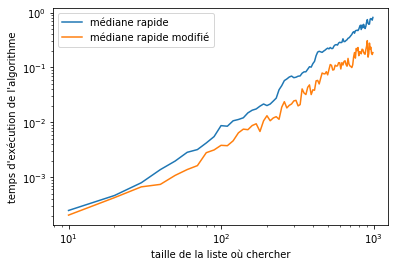

In [10]:
import time
import matplotlib.pyplot as plt
import numpy as np
import random as rd

def complexite_moyenne(n_min,n_max,pas,nbre_moyenne,algorithme):
    duree = []
    taille = []
    i = 0
    for n in range(n_min,n_max,pas):
        taille.append(n)
        duree.append(0)
        L=list(range(n))
        for m in range(nbre_moyenne):
            rd.shuffle(L)
            depart = time.clock()
            algorithme(L)
            arrive = time.clock()
            duree[i]=duree[i]+arrive-depart
        i += 1
    return taille, duree
   
n_min,n_max,pas,nbre_moyenne = 10,1000,10,10

taille_rapide, duree_rapide = complexite_moyenne(n_min,n_max,pas,nbre_moyenne,mediane_rapide)
taille_rapide_deux, duree_rapide_deux = complexite_moyenne(n_min,n_max,pas,nbre_moyenne,mediane_rapide_deux)

plt.loglog(taille_rapide,duree_rapide,'-')
plt.loglog(taille_rapide_deux,duree_rapide_deux,'-')
plt.xlabel('taille de la liste où chercher')
plt.ylabel("temps d'exécution de l'algorithme")
plt.legend(('médiane rapide','médiane rapide modifié'), loc='upper left')

plt.show()

## Exercice:

L’algorithme que l’on écrit ici permet de déterminer la
médiane, et même plus généralement le k-ième élément d’un tableau, sans le trier intégralement. Il est
linéaire dans le pire des cas.

- Écrire une fonction qui prend en argument un tableau de cinq éléments et calcule sa médiane.
- Écrire une fonction qui prend en argument un tableau quelconque, le divise en groupes de cinq éléments
et construit le tableau des médianes de chaque groupe de cinq.
- Modifier la fonction précédente pour qu’elle s’appelle récursivement sur le « tableau des médianes »
construit.
- Enfin, écrire une fonction qui effectue une partition du tableau de départ avec pour pivot la « médiane
des médianes » calculée précédemment.
Pour trouver le k-ième élément du tableau, où doit-on le chercher en fonction des tailles des deux
sous-tableaux délimités par la partition ? Programmer l’appel récursif correspondant.
- Pourquoi n’est-ce pas une bonne idée d’extraire les groupes de cinq éléments avec la construction
t[i:i+5] ? Comment peut-on procéder autrement ?
- De même, on pourra chercher une façon de construire en place le tableau des médianes.